#**Institución Universitaria Pascual Bravo**
#Curso: Reconocimiento de patrones 2024-1

#Docente: Juan Carlos Briñez de León
#Aplicación reconocimiento facial

1. Conectando el drive

In [ ]:
# @title
#Conectando google drive
from google.colab import drive
drive.mount('/content/drive')

2. cargando soportes y funciones

In [ ]:
# @title
#Cargando el vector decodificador LBP
import pandas as pd
import numpy as np
LBP_Codes = pd.read_excel(r'/content/drive/MyDrive/Cursos IUPB 2024-1/Reconocimiento de patrones/Material de clase/Semana 9/LBP_Codes.xlsx')
LBP_Codes = np.array(LBP_Codes)

# Función LBP
def LBP_Brinez(Img_gris,LBP_Codes):

  [Fl, Cl] = Img_gris.shape #Almacena el número de filas y Columnas
  Matriz_LBP = np.zeros((Fl,Cl))
  Pesos = np.array([[1,2,4],[128,0,8],[64,32,16]])

  for j in range(1, Cl-1, 1):#Columnas
    for i in range(1, Fl-1, 1):#Filas
      Region = Img_gris[i-1:i+2,j-1:j+2]
      Referencia = Img_gris[i,j]
      Region_Bin = Region >= Referencia
      Escalada = Region_Bin*Pesos
      Suma = np.sum(Escalada)
      Codigo = LBP_Codes[Suma,1]
      Matriz_LBP[i,j] = Codigo

  LBP_Histograna = np.histogram(Matriz_LBP, bins=59, range=(0, 58))
  LBP_Histograna = LBP_Histograna[0]
  LBP_Vector = np.zeros((1,len(LBP_Histograna)))
  for i in range(len(LBP_Histograna)):
    LBP_Vector[0,i] = LBP_Histograna[i]
  return (Matriz_LBP,LBP_Vector)

3. Aplicando modelo a casos de validación

Saving 5.jpg to 5.jpg


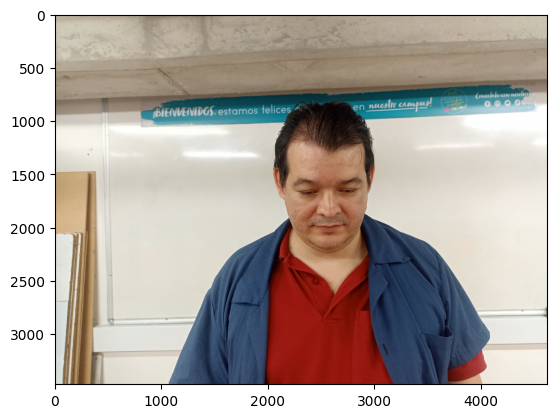

 
Bienvenido:  Profesor Valencia


In [4]:
# @title
#Cargando librerías
from google.colab import files
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt
import os

# Cargar el modelo desde el archivo
Modelo_entrenado = joblib.load('/content/drive/MyDrive/Cursos IUPB 2024-1/Reconocimiento de patrones/Material de clase/Semana 9/Face recognition/Modelo_faces_KNN.pkl')

# Cargar la imegen de validación desde el sistema local
uploaded = files.upload()
Nombre_archivo = list(uploaded.keys())[0]
Imagen=cv2.imread(Nombre_archivo)
Filas = 300
Columnas = 300
I_gris=cv2.cvtColor(Imagen, cv2.COLOR_BGR2GRAY)
I_gris=cv2.resize(I_gris, (Filas,Columnas), interpolation = cv2.INTER_AREA)
plt.imshow(Imagen[:,:,[2,1,0]],cmap='gray',vmin=0, vmax=255)
plt.show()
print(" ")

# Aplicando el proceso a la imagen de validación
Matriz_Características = np.zeros((1,59*16)) #16 vectores LBP sin etiqueta
Detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
Cara = Detector.detectMultiScale(I_gris, scaleFactor=1.1, minNeighbors=10, minSize=(20,20), maxSize=(300,300))
Tamaño_Roi = int(48)
Filas_2 = Tamaño_Roi
Columnas_2 = Tamaño_Roi
Particiones = Filas_2/4
for (x,y,w,h) in Cara:
    Recorte=I_gris[y:y+h,x:x+w]
del Cara
Recorte=cv2.resize(Recorte, (Filas_2,Columnas_2))
Contador = 0
for j in range(0,4):
  for k in range(0,4):
      Matriz_LBP,Matriz_Características[0,Contador*59:(Contador*59+59)] = LBP_Brinez(Recorte[j*12:(j*12+12),k*12:(k*12 + 12)],LBP_Codes)
      Contador+=1

Prediccion =Modelo_entrenado.predict (Matriz_Características)

Nombres = ["Auxiliar 1","Profesor Romero","Profesor Valencia","Auxiliar David","Auxiliar 2","Auxiliar 2","Auxiliar Jefferson" ]

print("Bienvenido: ",Nombres[int(Prediccion[0])-1])

os.remove(Nombre_archivo)